In [1]:
#@title
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.manifold import TSNE

# classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold


from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from datetime import datetime
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from joblib import Parallel, delayed

import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


https://github.com/Denbergvanthijs/imbDRL/blob/master/imbDRL/agents/ddqn.py

In [2]:
#@title
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.manifold import TSNE

# classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from datetime import datetime
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from joblib import Parallel, delayed

import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!pip install tensorflow==2.9 tf_agents gym matplotlib pandas seaborn sklearn tqdm

In [5]:
X = pd.read_csv("/content/drive/MyDrive/SC-ML Research/x_vif_only.csv")
X.drop(['Unnamed: 0','rev_stop'], axis=1, inplace=True)
y = pd.read_csv("/content/drive/MyDrive/SC-ML Research/y.csv")['went_on_backorder']
df=pd.concat([X,y],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No backorder', round(y.value_counts()[0]/len(y) * 100,2), '% of the dataset')
print('Backorder', round(y.value_counts()[1]/len(y) * 100,2), '% of the dataset')

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No backorder 99.3 % of the dataset
Backorder 0.7 % of the dataset
Train: [ 259572  259620  259654 ... 1775315 1775316 1775317] Test: [     0      1      2 ... 355895 355896 355897]
Train: [      0       1       2 ... 1775315 1775316 1775317] Test: [259572 259620 259654 ... 711229 711230 711231]
Train: [      0       1       2 ... 1775315 1775316 1775317] Test: [ 562975  562992  563216 ... 1066527 1066528 1066529]
Train: [      0       1       2 ... 1775315 1775316 1775317] Test: [ 913555  913679  913781 ... 1549977 1550291 1550807]
Train: [      0       1       2 ... 1549977 1550291 1550807] Test: [1420136 1420137 1420138 ... 1775315 1775316 1775317]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99296253 0.00703747]
[0.99296181 0.00703819]


In [7]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, RandomizedSearchCV

sm1 = NearMiss(sampling_strategy={0:500,1:500}) # 500:500
X_train, y_train = sm1.fit_resample(original_Xtrain, original_ytrain)
sm2 = NearMiss(sampling_strategy={0:200,1:67}) # 200:200
X_test, y_test = sm2.fit_resample(original_Xtest, original_ytest)

In [10]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


After OverSampling, the shape of train_X: (1000, 14)
After OverSampling, the shape of train_y: (1000,) 

After OverSampling, counts of label '1': 500
After OverSampling, counts of label '0': 500


In [11]:
X = X.astype(np.float64)
#X = (X - X.min()) / (X.max() - X.min())  # Normalization should happen after splitting train and test sets

In [12]:
min_class = [1]  # Minority classes
maj_class = [0]  # Majority classes

## Classification with the Double Deep Q-Network (DDQN): Reinforecement Learning

In [ ]:
!pip install imbDRL

In [14]:
import os

import numpy as np
import tensorflow_datasets as tfds
from imbDRL.agents.ddqn import TrainDDQN
from imbDRL.data import get_train_test_val
from imbDRL.utils import rounded_dict
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout

## Function

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (auc, average_precision_score, confusion_matrix,
                             f1_score, precision_recall_curve, roc_curve)
from tensorflow import constant
from tf_agents.trajectories import time_step


def network_predictions(network, X: np.ndarray) -> dict:
    """Computes y_pred using a given network.
    Input is array of data entries.
    :param network: The network to use to calculate metrics
    :type  network: (Q)Network
    :param X: X data, input to network
    :type  X: np.ndarray
    :return: Numpy array of predicted targets for given X
    :rtype: np.ndarray
    """
    if not isinstance(X, np.ndarray):
        raise ValueError(f"`X` must be of type `np.ndarray` not {type(X)}")

    q, _ = network(X, step_type=constant([time_step.StepType.FIRST] * X.shape[0]), training=False)
    return np.argmax(q.numpy(), axis=1)  # Max action for each x in X


def decision_function(network, X: np.ndarray) -> dict:
    """Computes the score for the predicted class of each x in X using a given network.
    Input is array of data entries.
    :param network: The network to use to calculate the score per x in X
    :type  network: (Q)Network
    :param X: X data, input to network
    :type  X: np.ndarray
    :return: Numpy array of scores for given X
    :rtype: np.ndarray
    """
    if not isinstance(X, np.ndarray):
        raise ValueError(f"`X` must be of type `np.ndarray` not {type(X)}")

    q, _ = network(X, step_type=constant([time_step.StepType.FIRST] * X.shape[0]), training=False)
    return np.max(q.numpy(), axis=1)  # Value of max action for each x in X


def classification_metrics(y_true: list, y_pred: list) -> dict:
    """Computes metrics using y_true and y_pred.
    :param y_true: True labels
    :type  y_true: np.ndarray
    :param y_pred: Predicted labels, corresponding to y_true
    :type  y_pred: np.ndarray
    :return: Dictionairy containing Geometric Mean, F1, Precision, Recall, TP, TN, FP, FN
    :rtype: dict
    """
    if not isinstance(y_true, (list, tuple, np.ndarray)):
        raise ValueError(f"`y_true` must be of type `list` not {type(y_true)}")
    if not isinstance(y_pred, (list, tuple, np.ndarray)):
        raise ValueError(f"`y_pred` must be of type `list` not {type(y_pred)}")
    if len(y_true) != len(y_pred):
        raise ValueError("`X` and `y` must be of same length.")

    # labels=[0, 1] to ensure 4 elements are returned: https://stackoverflow.com/a/46230267
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()

    precision = TP / (TP + FP) if TP + FP else 0  # Positive predictive value
    recall = TP / (TP + FN) if TP + FN else 0  # Sensitivity, True Positive Rate (TPR)
    specificity = TN / (TN + FP) if TN + FP else 0  # Specificity, selectivity, True Negative Rate (TNR)

    G_mean = np.sqrt(recall * specificity)  # Geometric mean of recall and specificity
    F1 = f1_score(y_true, y_pred, zero_division=0)  # Default F-measure

    return {"Gmean": G_mean, "F1": F1, "Precision": precision, "Recall": recall, "TP": TP, "TN": TN, "FP": FP, "FN": FN}


def plot_pr_curve(network, X_test: np.ndarray, y_test: np.ndarray,
                  X_train: np.ndarray = None, y_train: np.ndarray = None) -> None:   # pragma: no cover
    """Plots PR curve of X_test and y_test of given network.
    Optionally plots PR curve of X_train and y_train.
    Average precision is shown in the legend.
    :param network: The network to use to calculate the PR curve
    :type  network: (Q)Network
    :param X_test: X data, input to network
    :type  X_test: np.ndarray
    :param y_test: True labels for `X_test`
    :type  y_test: np.ndarray
    :param X_train: Optional X data to plot validation PR curve
    :type  X_train: np.ndarray
    :param y_train: True labels for `X_val`
    :type  y_train: np.ndarray
    :return: None
    :rtype: NoneType
    """

    plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot((0, 1), (1, 0), color="black", linestyle="--", label="Baseline")

    # TODO: Consider changing baseline

    if X_train is not None and y_train is not None:
        y_val_score = decision_function(network, X_train)
        val_precision, val_recall, _ = precision_recall_curve(y_train, y_val_score)
        val_AP = average_precision_score(y_train, y_val_score)
        plt.plot(val_recall, val_precision, label=f"Train AP: {val_AP:.3f}")

    y_test_score = decision_function(network, X_test)
    test_precision, test_recall, _ = precision_recall_curve(y_test, y_test_score)
    test_AP = average_precision_score(y_test, y_test_score)
    ax.plot(test_recall, test_precision, label=f"Test AP: {test_AP:.3f}")

    ax.set_xlim((-0.05, 1.05))
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title("Precision-Recall Curve For DDQN")
    ax.set_aspect("equal", adjustable="box")
    ax.legend(loc="upper right")
    ax.grid(True)
    plt.savefig('pr_curve.png', dpi=300, bbox_inches='tight')
    plt.show()



import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curve(network, X_test: np.ndarray, y_test: np.ndarray,
                   X_train: np.ndarray = None, y_train: np.ndarray = None) -> None:   # pragma: no cover
    """Plots ROC curve of X_test and y_test of given network.
    Optionally plots ROC curve of X_train and y_train.
    Average precision is shown in the legend.
    :param network: The network to use to calculate the PR curve
    :type  network: (Q)Network
    :param X_test: X data, input to network
    :type  X_test: np.ndarray
    :param y_test: True labels for `X_test`
    :type  y_test: np.ndarray
    :param X_train: Optional X data to plot validation PR curve
    :type  X_train: np.ndarray
    :param y_train: True labels for `X_val`
    :type  y_train: np.ndarray
    :return: None
    :rtype: NoneType
    """

    plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot((0, 1), (0, 1), color="black", linestyle="--", label="Baseline")

    if X_train is not None and y_train is not None:
        y_train_score = decision_function(network, X_train)
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)
        ax.plot(fpr_train, tpr_train, label=f"Train AUROC: {auc(fpr_train, tpr_train):.2f}",
                 linestyle='-', linewidth=2)  # Customize line style and width

    y_test_score = decision_function(network, X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)

    ax.plot(fpr_test, tpr_test, label=f"Test AUROC: {auc(fpr_test, tpr_test):.2f}",
             linestyle='-', linewidth=2)  # Customize line style and width

    ax.set_xlim((-0.05, 1.05))
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("False Positive Rate", fontsize=12)  # Adjust font size
    ax.set_ylabel("True Positive Rate", fontsize=12)  # Adjust font size
    ax.set_title("ROC Curve For DDQN", fontsize=14)  # Adjust font size
    ax.set_aspect("equal", adjustable="box")
    ax.legend(loc="lower right", fontsize=10)  # Adjust font size
    ax.grid(True)

    plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')  # Save the figure with higher resolution
    plt.show()


def plot_confusion_matrix(TP: int, FN: int, FP: int, TN: int) -> None:
    """
    Plots a confusion matrix based on the True Positive (TP), False Negative (FN), False Positive (FP), and True Negative (TN) values.
    :param TP: True Positive
    :type  TP: int
    :param FN: False Negative
    :type  FN: int
    :param FP: False Positive
    :type  FP: int
    :param TN: True Negative
    :type  TN: int
    :return: None
    :rtype: NoneType
    """
    if not all(isinstance(i, (int, np.integer)) for i in (TP, FN, FP, TN)):
        raise ValueError("All arguments must be integers.")

    ticklabels = ("No Backorder", "Backorder")
    total = TP + FN + FP + TN
    confusion_matrix = np.array([[TP, FN], [FP, TN]]) / total * 100

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt=".2%", cmap="Blues", xticklabels=ticklabels, yticklabels=ticklabels)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig('confusion_matrix.png')
    plt.show()


## Data Split

In [16]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # CPU is faster than GPU on structured data

episodes = 100_000  # Total number of episodes
warmup_steps = 170_000  # Amount of warmup steps to collect data with random policy
memory_length = warmup_steps  # Max length of the Replay Memory
batch_size = 32
collect_steps_per_episode = 2000
collect_every = 500

target_update_period = 800  # Period to overwrite the target Q-network with the default Q-network
target_update_tau = 1  # Soften the target model update
n_step_update = 1

layers = [Dense(256, activation="relu"), Dropout(0.2),
          Dense(256, activation="relu"), Dropout(0.2),
          Dense(2, activation=None)]  # No activation, pure Q-values

learning_rate = 0.00025  # Learning rate
gamma = 0.0  # Discount factor
min_epsilon = 0.5  # Minimal and final chance of choosing random action
decay_episodes = episodes // 10  # Number of episodes to decay from 1.0 to `min_epsilon``


In [21]:
import sklearn
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  3840      
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  65792     
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  514       
                                                                 
Total params: 70,146
Trainable params: 70,146
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.
Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


170_000 frames collected!


Training the DDQN:   0%|          | 500/100000 [00:01<03:43, 445.27it/s]WARNING:tensorflow:From /usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: calling foldr_v2 (from tensorflow.python.ops.functional_ops) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
Training the DDQN: 100%|██████████| 100000/100000 [08:19<00:00, 200.10it/s]


Best score: 0.878049!


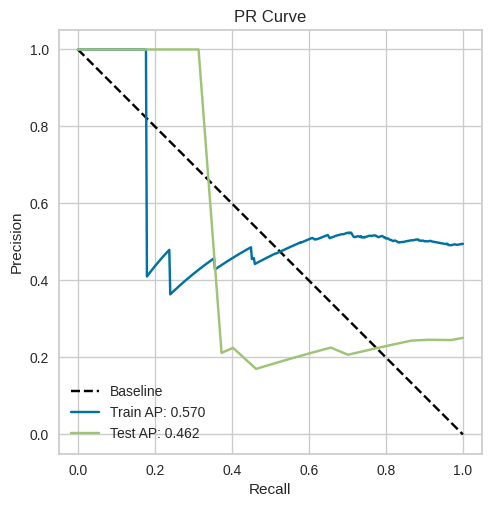

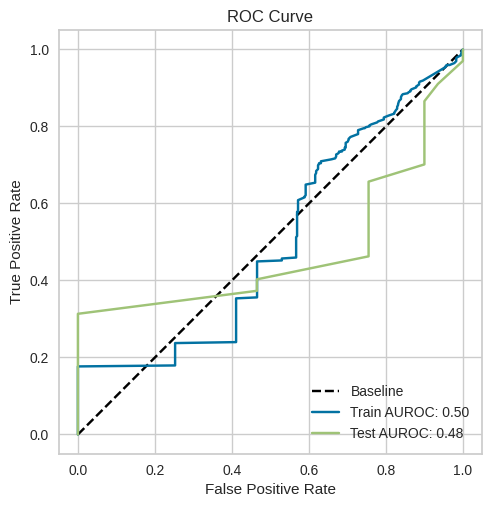

{'Gmean': 0.530418, 'F1': 0.446154, 'Precision': 0.300518, 'Recall': 0.865672, 'TP': 58, 'TN': 65, 'FP': 135, 'FN': 9}


In [23]:
model = TrainDDQN(episodes, warmup_steps, learning_rate, gamma, min_epsilon, decay_episodes, target_update_period=target_update_period,
                  target_update_tau=target_update_tau, batch_size=batch_size, collect_steps_per_episode=collect_steps_per_episode,
                  memory_length=memory_length, collect_every=collect_every, n_step_update=n_step_update)

model.compile_model(X_train, y_train, layers)
model.q_net.summary()
#os.mkdir('./models')
model.train(X_val, y_val, "F1")

stats = model.evaluate(X_test, y_test, X_train, y_train)
print(rounded_dict(stats))


In [24]:
model.q_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  3840      
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  65792     
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  514       
                                                                 
Total params: 70,146
Trainable params: 70,146
Non-trainable params: 0
_________________________________________________________________


Train: {'Gmean': 0.867414, 'F1': 0.865482, 'Precision': 0.869898, 'Recall': 0.861111, 'TP': 341, 'TN': 353, 'FP': 51, 'FN': 55}
Test:  {'Gmean': 0.530418, 'F1': 0.446154, 'Precision': 0.300518, 'Recall': 0.865672, 'TP': 58, 'TN': 65, 'FP': 135, 'FN': 9}


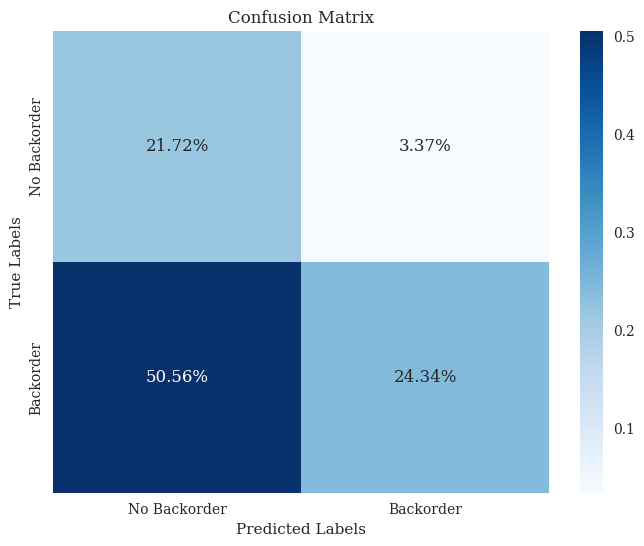

In [48]:
import os
import glob
from imbDRL.agents.ddqn import TrainDDQN
from imbDRL.data import load_csv

from imbDRL.utils import rounded_dict

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # CPU is faster than GPU on structured data

min_class = [1]  # Minority classes, same setup as in original paper
maj_class = [0]  # Majority classes
#fp_model = "/content/models/20230606_195524.pkl"
# Define the folder path
folder_path = "/content/models/"
# Get the list of .pkl files in the folder
pkl_files = glob.glob(os.path.join(folder_path, "*.pkl"))

#network = TrainDDQN.load_network(fp_model)
# Assuming there is only one .pkl file in the folder
if len(pkl_files) == 1:
    fp_model = pkl_files[0]
    network = TrainDDQN.load_network(fp_model)
    
y_pred_train = network_predictions(network, X_train)
y_pred_test = network_predictions(network, X_test)

stats = classification_metrics(y_train, y_pred_train)
print(f"Train: {rounded_dict(stats)}")
stats = classification_metrics(y_test, y_pred_test)
print(f"Test:  {rounded_dict(stats)}")

plot_confusion_matrix(stats.get("TP"), stats.get("FN"), stats.get("FP"), stats.get("TN"))

<Figure size 1500x1200 with 0 Axes>

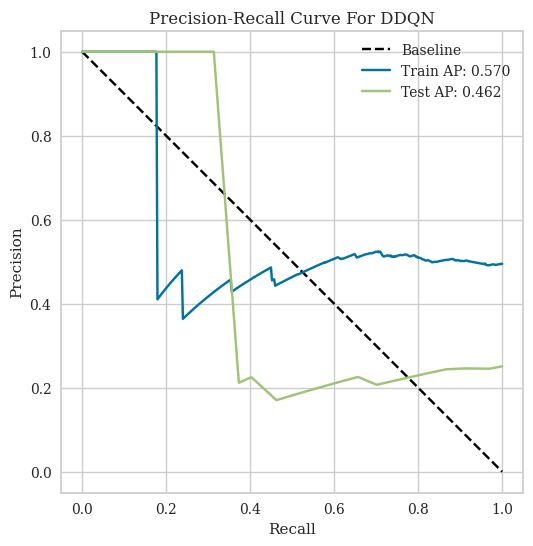

In [45]:
plt.figure(figsize=[15,12])
plot_pr_curve(network, X_test, y_test, X_train, y_train)

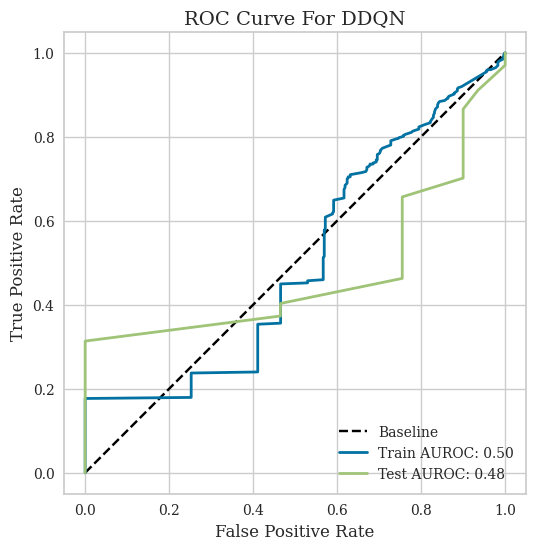

In [46]:
plot_roc_curve(network, X_test, y_test, X_train, y_train)

In [28]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.33      0.87      0.47      0.53      0.27       200
          1       0.30      0.87      0.33      0.45      0.53      0.30        67

avg / total       0.73      0.46      0.73      0.47      0.53      0.27       267



In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.33      0.47       200
           1       0.30      0.87      0.45        67

    accuracy                           0.46       267
   macro avg       0.59      0.60      0.46       267
weighted avg       0.73      0.46      0.47       267



In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, decision_function(network, X_test))

0.4758208955223881

In [31]:
from imblearn.metrics import make_index_balanced_accuracy,geometric_mean_score

alpha = 0.1
geo_mean = make_index_balanced_accuracy(alpha=alpha, squared=True)(geometric_mean_score)

print(
    f"The IBA using alpha={alpha} and the geometric mean: "
    f"{geo_mean(y_test, y_pred_test):.3f}"
)

# %%
alpha = 0.5
geo_mean = make_index_balanced_accuracy(alpha=alpha, squared=True)(geometric_mean_score)

print(
    f"The IBA using alpha={alpha} and the geometric mean: "
    f"{geo_mean(y_test, y_pred_test):.3f}"
)

The IBA using alpha=0.1 and the geometric mean: 0.281
The IBA using alpha=0.5 and the geometric mean: 0.281
